In [76]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve
import models.evaluate_models
from models.train_model import *
from models.evaluate_models import print_metrics
from preprocessing.preprocessing import *
import importlib
import models.train_model
import models.evaluate_models
import config_module.config
import config_module.config 
import preprocessing.preprocessing
importlib.reload(models.train_model) 
importlib.reload(models.evaluate_models) 
importlib.reload(preprocessing.preprocessing)
importlib.reload(config_module.config)

<module 'config_module.config' from 'c:\\Users\\Danny Phong\\Documents\\PROJECT\\WebVulnerabilities\\config_module\\config.py'>

In [77]:
def heatmap( model_name, y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Hợp lệ', 'Độc hại'])
    plt.title(f'Confusion Matrix trên tập test ({model_name})')
    plt.xlabel('Prediction')
    plt.ylabel('Reality')
    plt.show()

In [78]:
def plot_roc_curve(y_test, y_pred, model_name, y_test_proba):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve trên tập test ({model_name})')
    plt.legend()
    plt.show()

In [79]:

    
from sklearn.model_selection import train_test_split

import numpy as np
from config_module.config import CSIC_FILE, PARSE_REQUEST_TEST, PARSE_REQUEST_TRAIN, XTRAIN, YTRAIN, XVAL, YVAL, XTEST, YTEST
from data.raw_data import load

from config_module.config import RANDOM_STATE, TEST_SIZE_1, TEST_SIZE_2


data_raw = load(CSIC_FILE)
# data_raw_train = load(PARSE_REQUEST_TEST)
# data_raw1 = load(PARSE_REQUEST_TEST)
X_resampled, y_resampled = CSIC_preprocess(data_raw)
# X_resampled_1, y_resampled_1 = parsed_request_train_preprocess(data_raw_train)



# Train:Val:Test theo tỷ lệ 7:2:1
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)

# X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X_resampled_1, y_resampled_1, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
# X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)


PFeature Distribution by Class:
                url_length  url_special_chars  url_malicious_keywords  \
classification                                                          
0                78.985944           8.930694                1.290833   
1               106.611769          13.273050                2.087133   

                url_params_count  content_length  content_special_chars  \
classification                                                            
0                       1.166667       23.458167               2.875139   
1                       2.233034       50.990824               7.418033   

                content_malicious_keywords  
classification                              
0                                 0.513056  
1                                 1.123399  
Feature Distribution was saved!
Feature matrix shape: 300


In [80]:
np.save( XTRAIN,X_train),
np.save( YTRAIN,y_train),
np.save( XVAL,X_val),
np.save( YVAL,y_val),
np.save( XTEST,X_test),
np.save( YTEST,y_test)

In [81]:
from config_module.config import XTRAIN, YTRAIN, XTEST, YTEST, XVAL, YVAL
from numpy import load
import numpy as np
X_train = np.load(XTRAIN)
y_train = np.load(YTRAIN)
X_test = np.load(XTEST)
y_test = np.load(YTEST)
X_val = np.load(XVAL)
y_val = np.load(YVAL)

In [82]:
def train_test_decision_tree():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = decision_tree(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Decision Tree", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Decision Tree", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Decision Tree', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Decision Tree', y_test_proba)
    
    
# train_test_decision_tree()

In [83]:
def train_test_linear():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = linear_svc(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("LinearSVC", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("LinearSVC", y_test, y_test_pred, y_test_proba, "Test Set")
   
    heatmap('Linear SVC', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Linear SVC', y_test_proba)

In [84]:
# train_test_linear()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training time (s):426.17

Best hyperparameter : {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best recall on cross-validation: 0.9516197030254459
Prediction time (s):27.25
✅ Mô hình đã được lưu tại: knn.pkl

Validation on Tập val:
Accuracy: 0.9572
Test Error (1-Accuracy): 0.0428
Precision: 0.9544
Recall: 0.9610
F1-Score: 0.9577
ROC-AUC: 0.9841
Log Loss: 0.5142

Validation on Tập test:
Accuracy: 0.9563
Test Error (1-Accuracy): 0.0437
Precision: 0.9469
Recall: 0.9664
F1-Score: 0.9565
ROC-AUC: 0.9830
Log Loss: 0.5565
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9572
Test Error (1-Accuracy): 0.0428
Precision: 0.9544
Recall: 0.9610
F1-Score: 0.9577
ROC-AUC: 0.9841
Log Loss: 0.5142

Validation on Test Set:
Accuracy: 0.9563
Test Error (1-Accuracy): 0.0437
Precision: 0.9469
Recall: 0.9664
F1-Score: 0.9565
ROC-AUC: 0.9830
Log Loss: 0.5565


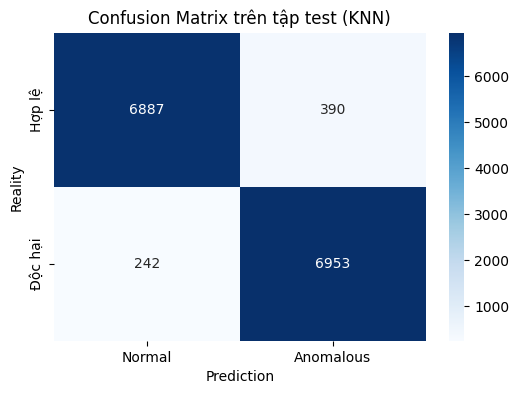

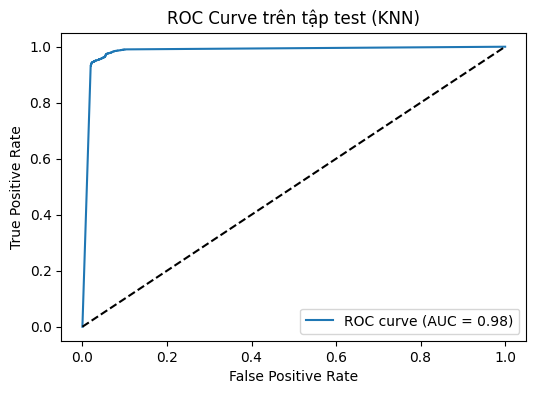

In [85]:

def train_test_knn():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = knn(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("KNN", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("KNN", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('KNN', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'KNN', y_test_proba)

train_test_knn()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training time (s):2.51

Best hyperparameter : {'var_smoothing': 1e-09}
Best recall on cross-validation: 0.7955925363509997
Prediction time (s):0.18
✅ Mô hình đã được lưu tại: naive_bayes_model.pkl

Validation on Tập val:
Accuracy: 0.8085
Test Error (1-Accuracy): 0.1915
Precision: 0.8565
Recall: 0.7446
F1-Score: 0.7967
ROC-AUC: 0.9097
Log Loss: 6.6491

Validation on Tập test:
Accuracy: 0.8050
Test Error (1-Accuracy): 0.1950
Precision: 0.8451
Recall: 0.7441
F1-Score: 0.7914
ROC-AUC: 0.9044
Log Loss: 6.7563
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.8085
Test Error (1-Accuracy): 0.1915
Precision: 0.8565
Recall: 0.7446
F1-Score: 0.7967
ROC-AUC: 0.9097
Log Loss: 6.6491

Validation on Test Set:
Accuracy: 0.8050
Test Error (1-Accuracy): 0.1950
Precision: 0.8451
Recall: 0.7441
F1-Score: 0.7914
ROC-AUC: 0.9044
Log Loss: 6.7563


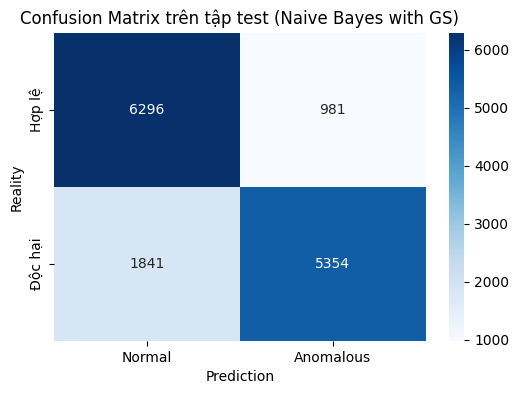

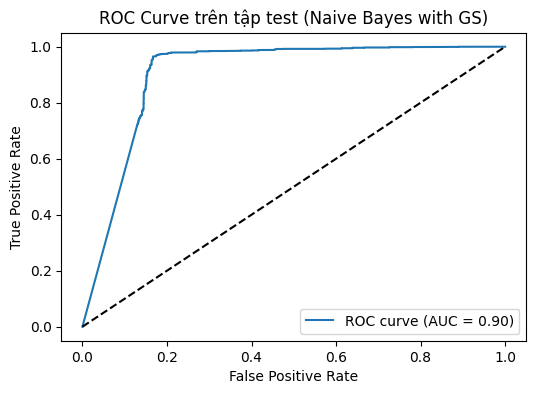

In [86]:

def train_test_naive_bayes():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = naive_bayes_opt_gs(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Naive Bayes", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Naive Bayes", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Naive Bayes with GS', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Naive Bayes with GS', y_test_proba)
train_test_naive_bayes()

CSIC dataset
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tranining time (s): 115.61

Best hyperparameter : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best recall on cross-validation: 0.9923454861253665
Prediction time (s): 0.19
✅ Mô hình đã được lưu tại: random_forest_grids.pkl

Validation on Tập val:
Accuracy: 0.9470
Test Error (1-Accuracy): 0.0530
Precision: 0.9112
Recall: 0.9914
F1-Score: 0.9496
ROC-AUC: 0.9948
Log Loss: 0.1206

Validation on Tập test:
Accuracy: 0.9397
Test Error (1-Accuracy): 0.0603
Precision: 0.8974
Recall: 0.9922
F1-Score: 0.9424
ROC-AUC: 0.9939
Log Loss: 0.1253
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9470
Test Error (1-Accuracy): 0.0530
Precision: 0.9112
Recall: 0.9914
F1-Score: 0.9496
ROC-AUC: 0.9948
Log Loss: 0.1206

Validation on Test Set:
Accuracy: 0.9397
Test Error (1-Accuracy): 0.0603
Precision: 0.8974
Recall: 0.9922
F1-Score: 0.9424
ROC-AUC: 0.9939
Log Loss: 0.1253


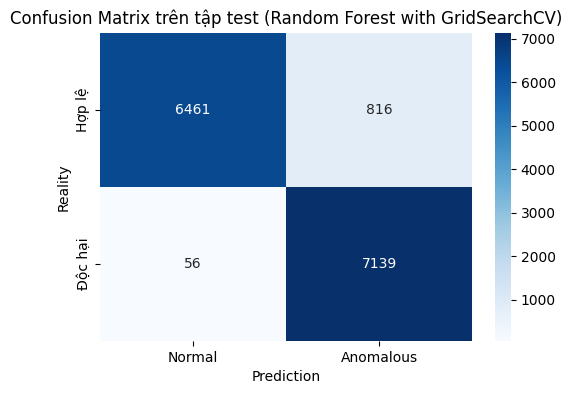

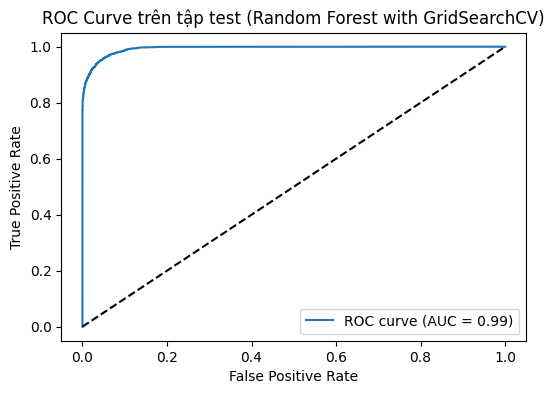

In [87]:
def train_test_rf():
    print("CSIC dataset")
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = random_forest_grid_search(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Random Forest", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Random Forest", y_test, y_test_pred, y_test_proba, "Test Set")
    # print("ECML dataset")
    # y_test_pred_1, y_test_proba_1, y_val_pred_1, y_val_proba_1, best_model = random_forest_grid_search(X_train_1, y_train_1, X_test_1, X_val_1)
    # print_metrics("Random Forest", y_val_1, y_val_pred_1, y_val_proba_1, "Validation Set")
    # print_metrics("Random Forest", y_test_1, y_test_pred_1, y_test_proba_1, "Test Set")
    heatmap('Random Forest with GridSearchCV', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Random Forest with GridSearchCV', y_test_proba)
train_test_rf()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training time (s):83.60

Best hyperparameter : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best recall on cross-validation: 0.9640796532082611
Prediction time (s):0.16
✅ Mô hình đã được lưu tại: xgboost.pkl

Validation on Tập val:
Accuracy: 0.9683
Test Error (1-Accuracy): 0.0317
Precision: 0.9618
Recall: 0.9758
F1-Score: 0.9688
ROC-AUC: 0.9973
Log Loss: 0.0679

Validation on Tập test:
Accuracy: 0.9636
Test Error (1-Accuracy): 0.0364
Precision: 0.9526
Recall: 0.9753
F1-Score: 0.9638
ROC-AUC: 0.9967
Log Loss: 0.0744
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9683
Test Error (1-Accuracy): 0.0317
Precision: 0.9618
Recall: 0.9758
F1-Score: 0.9688
ROC-AUC: 0.9973
Log Loss: 0.0679

Validation on Test Set:
Accuracy: 0.9636
Test Error (1-Accuracy): 0.0364
Precision: 0.9526
Recall: 0.9753
F1-Score: 0.9638
ROC-AUC: 0.9967
Log Loss: 0.0744


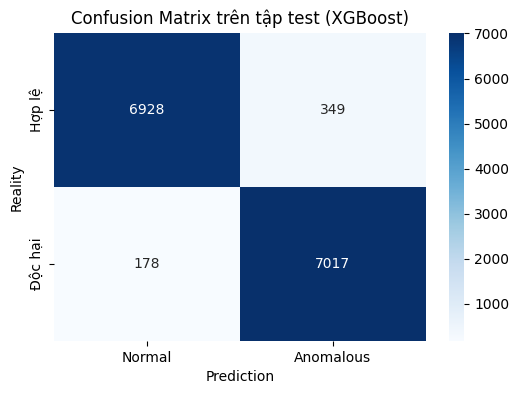

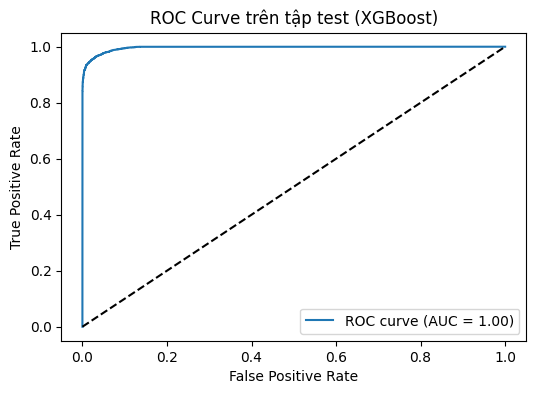

In [88]:
def train_test_xgboost():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = xgboost(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("XGboot", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("XGboot", y_test, y_test_pred, y_test_proba, "Test Set")   
    heatmap('XGBoost', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'XGBoost', y_test_proba)
train_test_xgboost()

   Train Type   Dataset  Accuracy  Test Error  Precision    Recall  F1-Score  \
0          ML   Tập val  0.945707    0.054293   0.947736  0.944305  0.946018   
1          ML  Tập test  0.940851    0.059149   0.942112  0.938707  0.940407   
2          ML   Tập val  0.948653    0.051347   0.964296  0.932609  0.948188   
3          ML  Tập test  0.946794    0.053206   0.953935  0.938290  0.946048   
4          ML   Tập val  0.957211    0.042789   0.954369  0.961014  0.957680   
5          ML  Tập test  0.956329    0.043671   0.946888  0.966366  0.956528   
6          ML   Tập val  0.808502    0.191498   0.856502  0.744639  0.796663   
7          ML  Tập test  0.805003    0.194997   0.845146  0.744128  0.791426   
8          ML   Tập val  0.946970    0.053030   0.911185  0.991367  0.949587   
9          ML  Tập test  0.939746    0.060254   0.897423  0.992217  0.942442   
10         ML   Tập val  0.968294    0.031706   0.961845  0.975773  0.968759   
11         ML  Tập test  0.963585    0.0

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_9864\397119161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Recall', palette='Set2')


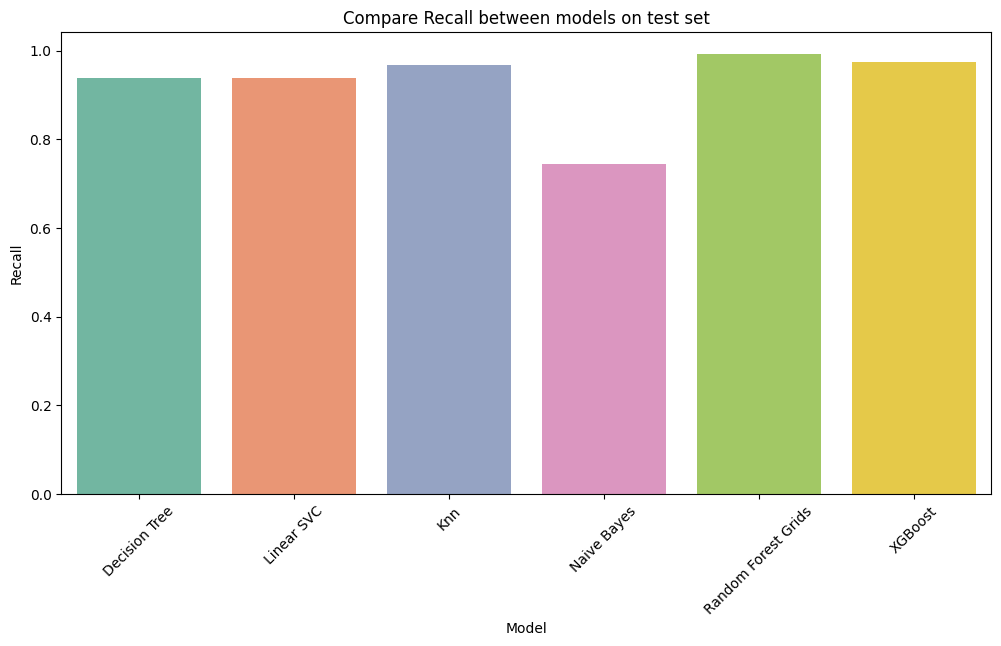

In [89]:
results_df = pd.read_csv('model_results.csv')
print(results_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Recall', palette='Set2')
plt.title('Compare Recall between models on test set')
plt.xticks(rotation=45)
plt.show()

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_9864\116253463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='F1-Score', palette='Set2')


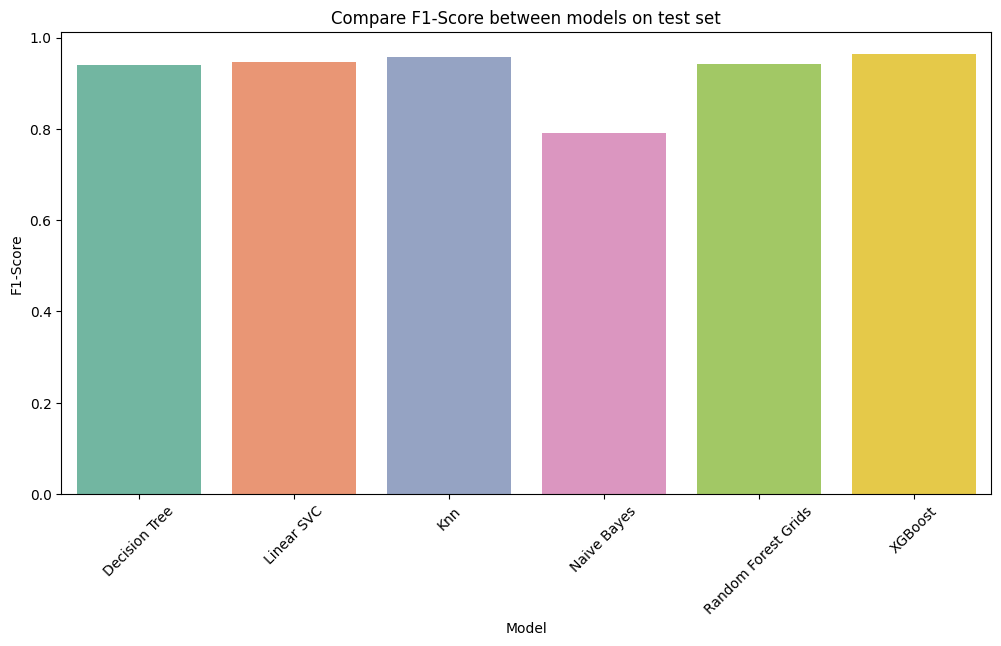

In [90]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='F1-Score', palette='Set2')
plt.title('Compare F1-Score between models on test set')
plt.xticks(rotation=45)
plt.show()

In [91]:
# All values
test_df = results_df[results_df['Dataset'] == 'Tập test'][[
    'Model', 'Accuracy', 'Test Error', 'Precision', 'Recall',
    'F1-Score', 'ROC-AUC', 'Log Loss', 'Training Time', 'Prediction Time'
]]

# Table
print("\n Compare all values:")
display(test_df) 


 Compare all values:


,Model,Accuracy,Test Error,Precision,Recall,F1-Score,ROC-AUC,Log Loss,Training Time,Prediction Time
1,Decision Tree,0.940851,0.059149,0.942112,0.938707,0.940407,0.942732,2.056210,186.779478,0.036376
3,Linear SVC,0.946794,0.053206,0.953935,0.938290,0.946048,0.988547,0.130378,339.822631,0.099029
5,Knn,0.956329,0.043671,0.946888,0.966366,0.956528,0.982968,0.556511,426.171254,27.247116
7,Naive Bayes,0.805003,0.194997,0.845146,0.744128,0.791426,0.904367,6.756294,2.514476,0.184386
9,Random Forest Grids,0.939746,0.060254,0.897423,0.992217,0.942442,0.993930,0.125268,115.612266,0.185606
11,XGBoost,0.963585,0.036415,0.952620,0.975261,0.963807,0.996736,0.074353,83.599041,0.162050


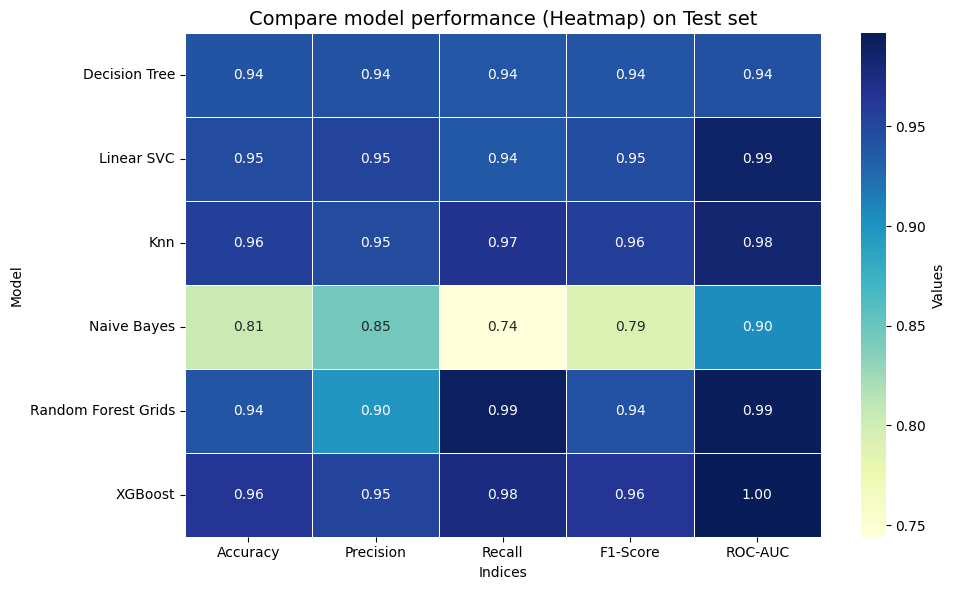

In [92]:
results_df = pd.read_csv('model_results.csv')

# Test set filter
test_df = results_df[results_df['Dataset'] == 'Tập test']

# Select indices
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
heatmap_data = test_df.set_index('Model')[metrics]

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Values'}, linewidths=0.5)

plt.title('Compare model performance (Heatmap) on Test set', fontsize=14)
plt.xlabel('Indices')
plt.ylabel('Model')
plt.tight_layout()

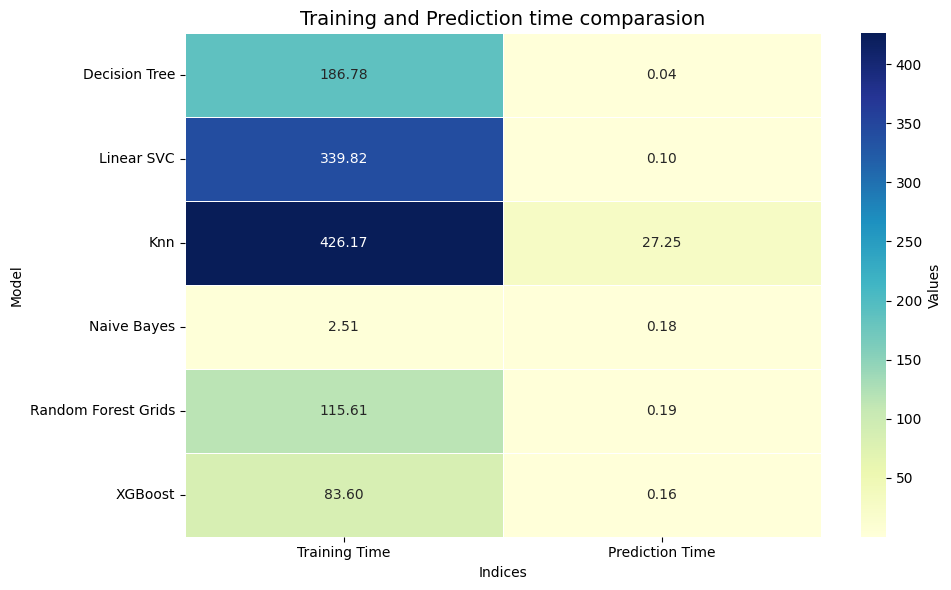

In [93]:
results_df = pd.read_csv('model_results.csv')

# Test set filter
test_df = results_df[results_df['Dataset'] == 'Tập test']

# Select indices
metrics = ['Training Time', 'Prediction Time']
heatmap_data = test_df.set_index('Model')[metrics]


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Values'}, linewidths=0.5)

plt.title('Training and Prediction time comparasion', fontsize=14)
plt.xlabel('Indices')
plt.ylabel('Model')
plt.tight_layout()

In [94]:
import shutil
import os

def delete_pycache(start_path='.'):
    for root, dirs, files in os.walk(start_path):
        for d in dirs:
            if d == '__pycache__':
                full_path = os.path.join(root, d)
                try:
                    shutil.rmtree(full_path)
                    print(f"Deleted: {full_path}")
                except Exception as e:
                    print(f"Error deleting {full_path}: {e}")

# Gọi hàm
delete_pycache()

Deleted: .\config_module\__pycache__
Deleted: .\data\__pycache__
Deleted: .\models\__pycache__
Deleted: .\preprocessing\__pycache__
